In [1]:
# from veneer import _rotare_img,crop_ve,cross_image
from veneer import Veneer, cross_image,crop_ve,_rotare_img
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from veneer import Buono_Brutto_Cattivo

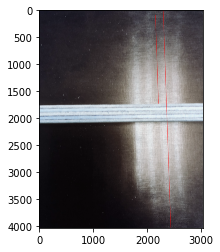

In [2]:
img=cv2.imread(r'D:\Projects\CVVeneer\data\train\5_3\IMG_2879.jpeg')
omg=_rotare_img(img)

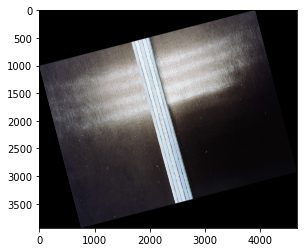

In [3]:
plt.imshow(omg)

4032 3024 3020
4032 151
[[33 40 44 ... 32 35 38]
 [33 37 40 ... 38 39 38]
 [33 34 36 ... 43 42 39]
 ...
 [11 11 11 ...  5  6  6]
 [10 10 10 ...  5  5  5]
 [ 9  9  8 ...  5  5  5]]


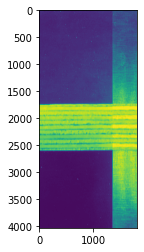

In [3]:
bg=Buono_Brutto_Cattivo(img,20)
bg.separate()

3024 4032 4020
3024 201
[[129 142 119 ...  46  49  51]
 [109 124 113 ...  47  50  51]
 [128 136 126 ...  49  50  51]
 ...
 [ 44  40  36 ...  26  24  26]
 [ 40  37  34 ...  28  25  23]
 [ 33  33  33 ...  29  27  20]]


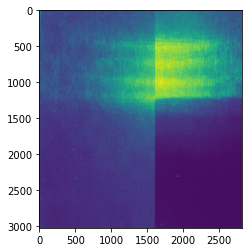

In [4]:

bg=Buono_Brutto_Cattivo(ndimage.rotate(img, 90),20)
bg.separate()

In [5]:
img_path=r'D:\Projects\CVVeneer\data\train\29\IMG_1952.jpeg'

In [6]:
bg=Buono_Brutto_Cattivo(img_path,20)
bg.separate()

TypeError: Expected Ptr<cv::UMat> for argument 'src'

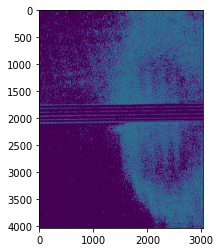

In [2]:
v1=Veneer(r'D:\Projects\CVVeneer\data\train\5_3\IMG_2879.jpeg')

ValueError: zero-size array to reduction operation minimum which has no identity

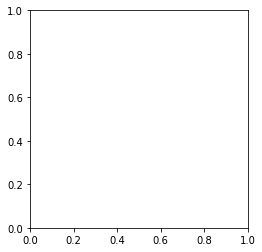

In [3]:
plt.imshow(v1.img_origin)

In [4]:
res=v1.conv_an()
print(res)
bw=v1.filt_img(v1.conv_img)
# plt.imshow(v1.img_origin)

1.0


d:\projects\cvveneer\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
d:\projects\cvveneer\venv\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 15 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


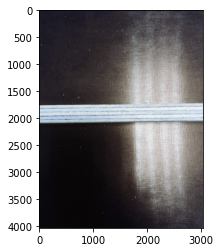

In [6]:
im=cv2.imread(r'D:\Projects\CVVeneer\data\train\5_3\IMG_2879.jpeg')
plt.imshow(im)

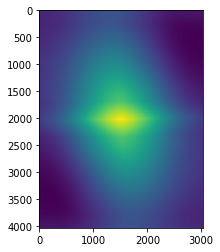

In [7]:
plt.imshow(cross_image(im,im))

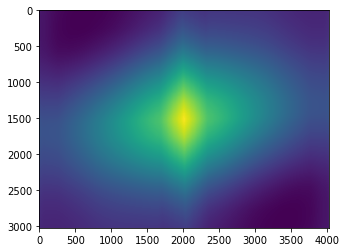

In [8]:
plt.imshow(cross_image(ndimage.rotate(im, 90),ndimage.rotate(im, 90)))

In [ ]:
# plt.imshow(bw,cmap='Greys')

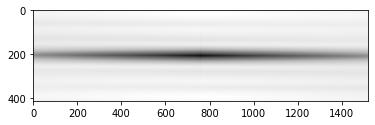

In [6]:
h,w=v1.conv_img.shape[0],v1.conv_img.shape[1]
lineimg,lines=v1.edge_detector(v1.conv_img,bw,minLineLength=w/4,maxLineGap=w/10)
plt.imshow(lineimg,cmap='Greys')

8.0


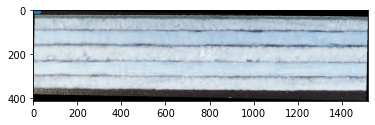

In [7]:
ans,img,fe,figg=v1.count_veneer(lineimg,minLineLength=w/4,maxLineGap=w/10)
plt.imshow(img)

print(ans)

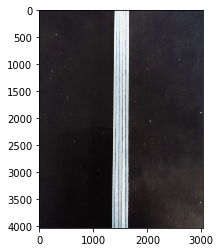

In [8]:
img = cv2.imread(r'D:\Projects\CVVeneer\data\test\5\IMG_2040.jpeg')
plt.imshow(img)

In [9]:
v1=Veneer(r'D:\Projects\CVVeneer\data\test\5\IMG_2040.jpeg')

3.0


d:\projects\cvveneer\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


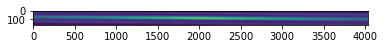

In [10]:
res=v1.conv_an()
print(res)

In [2]:
import glob

In [3]:
imgs=glob.glob(r'D:\Projects\CVVeneer\data\test\*\*.jpeg')
print(imgs)

['D:\\Projects\\CVVeneer\\data\\test\\11\\IMG_1890.jpeg', 'D:\\Projects\\CVVeneer\\data\\test\\11\\IMG_1891.jpeg', 'D:\\Projects\\CVVeneer\\data\\test\\11\\IMG_1892.jpeg', 'D:\\Projects\\CVVeneer\\data\\test\\11\\IMG_1893.jpeg', 'D:\\Projects\\CVVeneer\\data\\test\\11\\IMG_1894.jpeg', 'D:\\Projects\\CVVeneer\\data\\test\\11\\IMG_1895.jpeg', 'D:\\Projects\\CVVeneer\\data\\test\\11\\IMG_1896.jpeg', 'D:\\Projects\\CVVeneer\\data\\test\\11\\IMG_1897.jpeg', 'D:\\Projects\\CVVeneer\\data\\test\\11\\IMG_1898.jpeg', 'D:\\Projects\\CVVeneer\\data\\test\\11\\IMG_1899.jpeg', 'D:\\Projects\\CVVeneer\\data\\test\\11\\IMG_1900.jpeg', 'D:\\Projects\\CVVeneer\\data\\test\\11\\IMG_1901.jpeg', 'D:\\Projects\\CVVeneer\\data\\test\\11\\IMG_1902.jpeg', 'D:\\Projects\\CVVeneer\\data\\test\\11\\IMG_1903.jpeg', 'D:\\Projects\\CVVeneer\\data\\test\\11\\IMG_1904.jpeg', 'D:\\Projects\\CVVeneer\\data\\test\\11\\IMG_1905.jpeg', 'D:\\Projects\\CVVeneer\\data\\test\\11\\IMG_1906.jpeg', 'D:\\Projects\\CVVeneer\\data\

In [4]:
from pathlib import Path
path=Path(imgs[0])
parts=path.parts
print(parts[-2])
partscount=parts[-2]
print(partscount.split('_')[0])

11
11


In [5]:

import pandas as pd
from tqdm import tqdm
import random
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
df_score=pd.DataFrame(columns=['path','dir','conv_sc','real'])
an_imgs=random.sample(imgs,len(imgs))
for indx,imgss in enumerate(tqdm(an_imgs,total=len(an_imgs))):

    path=Path(imgss)
    parts=path.parts
    partscount=parts[-2]
    real_list_count=int(partscount.split('_')[0])
    try:
        v1=Veneer(str(path))
        res=v1.conv_an()
        # h,w=v1.conv_img.shape[0],v1.conv_img.shape[1]
        # bw=v1.filt_img(v1.conv_img)
        # lineimg,lines=v1.edge_detector(v1.conv_img,bw,minLineLength=w/4,maxLineGap=w/10)
        # ans,img,fe,figg=v1.count_veneer(lineimg,minLineLength=w/4,maxLineGap=w/10)
        df_score.loc[indx]=[str(path),str(partscount),int(res),int(real_list_count)]
    except BaseException as e:
        print(str(path),' error ',e)
        df_score.loc[indx]=[str(path),str(partscount),np.NAN,int(real_list_count)]

100%|██████████| 1144/1144 [4:34:10<00:00, 14.38s/it] 


In [7]:
df_score.to_csv(r'D:\Projects\CVVeneer\res\full_v7.csv')

In [39]:
print(df_score.isnull().sum(axis = 0))
df_nan0=df_score.dropna(axis=0)
ac_conv=(1-(np.abs(df_nan0.real-df_nan0.conv_sc))/df_nan0.real)
df_nan0['ac_conv']=ac_conv

print('Ac conv = ',df_nan0.ac_conv.mean())

path       0
dir        0
conv_sc    0
real       0
dtype: int64
Ac conv =  0.7161392668982913


In [40]:
df_nan0.to_csv(r'D:\Projects\CVVeneer\res\res_v7.csv')

In [41]:
df_nan0

,path,dir,conv_sc,real,ac_conv
0,D:\Projects\CVVeneer\data\test\29_7\IMG_2940.jpeg,29_7,37,29,0.724138
1,D:\Projects\CVVeneer\data\test\21_5\IMG_3042.jpeg,21_5,23,21,0.904762
2,D:\Projects\CVVeneer\data\test\7_2\IMG_2899.jpeg,7_2,5,7,0.714286
3,D:\Projects\CVVeneer\data\test\15\IMG_2093.jpeg,15,20,15,0.666667
4,D:\Projects\CVVeneer\data\test\21_2\IMG_2228.jpeg,21_2,26,21,0.761905
...,...,...,...,...,...
1139,D:\Projects\CVVeneer\data\test\11_2\IMG_2608.jpeg,11_2,21,11,0.0909091
1140,D:\Projects\CVVeneer\data\test\7_2\IMG_2903.jpeg,7_2,7,7,1
1141,D:\Projects\CVVeneer\data\test\29\IMG_1960.jpeg,29,27,29,0.931034
1142,D:\Projects\CVVeneer\data\test\21_3\IMG_2714.jpeg,21_3,17,21,0.809524


In [54]:
df_res=pd.read_csv(r'D:\Projects\CVVeneer\res\res_v7.csv',index_col=['Unnamed: 0'])
print(df_res.head())
df_g=df_res.drop(columns=['path'])
print(df_g.head())
df_g=df_g.groupby(['dir']).mean()
df_g['count']=df_res.groupby(['dir']).count().path

                                                path   dir  conv_sc  real  \
0  D:\Projects\CVVeneer\data\test\29_7\IMG_2940.jpeg  29_7       37    29   
1  D:\Projects\CVVeneer\data\test\21_5\IMG_3042.jpeg  21_5       23    21   
2   D:\Projects\CVVeneer\data\test\7_2\IMG_2899.jpeg   7_2        5     7   
3    D:\Projects\CVVeneer\data\test\15\IMG_2093.jpeg    15       20    15   
4  D:\Projects\CVVeneer\data\test\21_2\IMG_2228.jpeg  21_2       26    21   

    ac_conv  
0  0.724138  
1  0.904762  
2  0.714286  
3  0.666667  
4  0.761905  
    dir  conv_sc  real   ac_conv
0  29_7       37    29  0.724138
1  21_5       23    21  0.904762
2   7_2        5     7  0.714286
3    15       20    15  0.666667
4  21_2       26    21  0.761905


In [55]:
df_g

,conv_sc,real,ac_conv,count
dir,,,,
11,17.571429,11.0,0.402597,21
11_1,15.285714,11.0,0.575758,21
11_2,24.285714,11.0,-0.207792,21
11_3,2.052632,11.0,0.186603,19
13,14.714286,13.0,0.868132,21
13_1,17.333333,13.0,0.652015,21
13_2,15.388889,13.0,0.816239,18
13_3,2.500000,13.0,0.192308,20
15,20.450000,15.0,0.636667,20


In [56]:
df_g.ac_conv.mean()

0.7146823545281986

In [59]:
df_15l=df_g[~df_g.index.str.contains('_')]

In [60]:
df_15l.ac_conv.mean()

0.8183353451443937

In [47]:
df_15l.to_csv(r'D:\Projects\CVVeneer\res\max_without__res_v7.csv')

In [ ]:
df_nan0['realll']=[0 for i in range(len(df_nan0.path))]
file_split=df_nan0.path
for i,path1 in enumerate(file_split):
    path=Path(path1)
    parts=path.parts
    partscount=parts[-2]
    real_list_count=partscount.split('_')
    if len(real_list_count)<2:
        df_nan0['realll'].loc[i]=int(real_list_count[0])

In [ ]:
df_nan0true=df_nan0[df_nan0.realll!=0]

In [ ]:
ac_class=1-(np.abs(df_nan0true.real-df_nan0true.classic_sc))/df_nan0true.real
df_nan0true['ac_class']=ac_class
ac_conv=1-(np.abs(df_nan0true.real-df_nan0true.conv_sc))/df_nan0true.real
df_nan0true['ac_conv']=ac_conv
print('Ac conv = ',df_nan0true.ac_conv.mean(),' Ac class = ',df_nan0true.ac_class.mean())

In [ ]:
df_nan0true.to_csv(r'D:\Projects\CVVeneer\res\res_truev2.csv')
